<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DFT" data-toc-modified-id="DFT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DFT</a></span></li></ul></div>

## DFT

In [1]:
import math as ma
import numpy as np
import cmath as cm
from decimal import *
from matplotlib import pyplot as plt

In [2]:
def nsize(xn, zero_index):
    '''Generate an array sized from the input array [xn] and shifted according to zero index\n
       zero index is the nth integer from the left ie... [1,0,8,2], 8 is 3rd integer so zero_index is 3
    '''
    stop = (len(xn) - zero_index) + 1 #defines end point of array
    start = -(abs((len(xn))) - stop)
    return list(range(start,stop))

# adjusted indexing and output of list
def nrange(start,stop):
    '''Define an array with MATLAB like indexing, returns a list'''
    return list(range(start,stop + 1))

def dft(xn):
    n = np.array(nsize(xn,1))
    N = len(n)-1
    k = n
    WN = e**(-1j*2*ma.pi/N)
    nk = np.array(n*k)
    WNnk = np.array(WN**(nk))
    return np.array(xn*WNnk)

fft = np.fft.fft

In [3]:
def dft2(x,N):    
    # >> Discrete Fourier transform for sampled signals
    # x [in]: sampled signals, a list of magnitudes (real numbers)
    # yr [out]: real parts of the sinusoids
    # yi [out]: imaginary parts of the sinusoids
    yr = []
    yi = []
    for k in range(N):
        real, imag= 0, 0
        for n in range(N):
            theta =-k * (2 * ma.pi) * (float(n) / N)
            real += x[n] * ma.cos(theta)
            imag += x[n] * ma.sin(theta)
            yr.append(real / N)
            yi.append(imag / N)
    #print(f" {yr} + j{yi}")
    return yr,yi

In [4]:
def fft_v(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
    return X.ravel()

In [5]:
fft_v([0,1,2,3])

array([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [6]:
x = [0,1,2,3]

xf = [float(i) for i in x]
N = len(xf)
if ma.log2(N) % 1 > 0:
    print("Must be a power of 2")
minN = min(N,2)
n = list(range(0,minN))
#M = cmath.exp(-2*1j*cmath.pi*n*k/minN)

In [7]:
array = [0,1]
rows = len(array)
columns = 1

In [8]:
x

[0, 1, 2, 3]

In [9]:
x = [2,1,-2,3,-1,-1,1]
N = 7
k=1
n=0
WN = cm.exp(-1j*2*cm.pi/N)
#x0 = 1/N*(x[n]*WN**(k*n) + x[n+1]*WN**(k*n+1) + x[n+2]*WN**(k*n+2) + x[n+3]*WN**(k*n+3) + x[n+4]*WN**(k*n+4) + x[n+5]*WN**(k*n+5) + x[n+6]*WN**(k*n+6)) 
x0 = []
for i in range(len(x)):
    x0.append((1/N)*x[n]*WN**(k*n))
    n = n+1

In [10]:
x0

[(0.2857142857142857+0j),
 (0.0890699716941048-0.1116902117811471j),
 (0.06357740970180407+0.27855083205194964j),
 (-0.3861295148153225-0.185950173907525j),
 (0.1287098382717742-0.061983391302508274j),
 (0.03178870485090211-0.13927541602597482j),
 (0.08906997169410476+0.11169021178114719j)]

In [11]:
sum(x0)

(0.30180066711165315-0.10865814918405836j)

In [12]:
x = [2,1,-2,3,-1,-1,1]
def dftpair(x,N,k):
    n = 0
    x0 = []
    WN = cm.exp(-1j*2*cm.pi/N)
    for i in range(len(x)):
        x0.append((1/N)*x[n]*WN**(k*n))
        n = n+1
    return sum(x0)

def dft_m(x,N): 
    k = 0
    xn = []
    for i in range(0,len(x)):
        xn.append(dftpair(x,N,k))
        k = k + 1  
    return xn

def dft_real(x,N):
    xn = dft_m(x,N)
    return [i.real for i in xn]

def dft_imag(x,N):
    xn = dft_m(x,N)
    return [i.imag for i in xn]

def dft_mag(x,N):
    xn = dft_m(x,N)
    return [abs(i) for i in xn]

def dft_phase(x,N):
    xn = dft_m(x,N)
    return [cm.phase(i) for i in xn]

In [13]:
dft_m(x,7)

[(0.42857142857142855+0j),
 (0.30180066711165315-0.10865814918405836j),
 (0.7864063342160135+0.38477745582208056j),
 (-0.3024927156133811-0.6687918758850468j),
 (-0.3024927156133819+0.668791875885046j),
 (0.7864063342160148-0.3847774558220803j),
 (0.30180066711165304+0.10865814918405868j)]

In [14]:
r = dft_real(x,7)
n = nsize(r,1)

In [15]:
i = dft_imag(x,7)

In [16]:
m = dft_mag(x,7)

In [17]:
ph = dft_phase(x,7)

<StemContainer object of 3 artists>

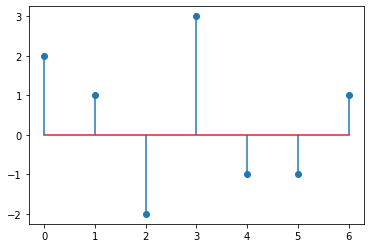

In [18]:
plt.stem(n,x)

<StemContainer object of 3 artists>

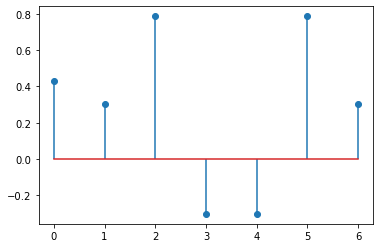

In [19]:
plt.stem(n,r)

<StemContainer object of 3 artists>

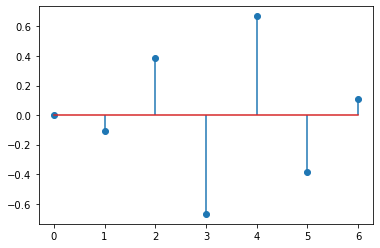

In [20]:
plt.stem(n,i)

<StemContainer object of 3 artists>

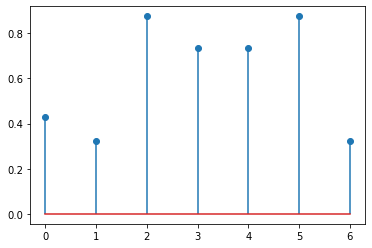

In [21]:
plt.stem(n,m)

<StemContainer object of 3 artists>

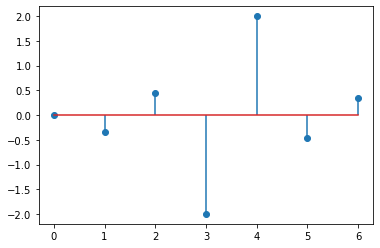

In [22]:
plt.stem(n,ph)